In [564]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
import matplotlib.pyplot as plt


In [565]:
# Load dữ liệu
data = pd.read_csv('processed_data.csv')

In [566]:
# Chuyển đổi cột 'DateTime' thành kiểu datetime và đặt làm chỉ mục
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.set_index('DateTime')

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nhiet_do           52416 non-null  float64
 1   do_am              52416 non-null  float64
 2   toc_do_gio         52416 non-null  float64
 3   dong_buc_xa_chung  52416 non-null  float64
 4   dong_buc_xa_tx     52416 non-null  float64
 5   khu1               52416 non-null  float64
 6   khu2               52416 non-null  float64
 7   khu3               52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [567]:
data.tail()

,nhiet_do,do_am,toc_do_gio,dong_buc_xa_chung,dong_buc_xa_tx,khu1,khu2,khu3
DateTime,,,,,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [568]:
52416-10484 

41932

In [569]:
data.iloc[41932]

nhiet_do                17.83000
do_am                   93.60000
toc_do_gio               0.08400
dong_buc_xa_chung        0.07700
dong_buc_xa_tx           0.13000
khu1                 25573.39168
khu2                 16659.33610
khu3                 12348.69301
Name: 2017-10-19 04:40:00, dtype: float64

In [570]:
# Chọn các cột đặc trưng (exclude DateTime)
features = ['nhiet_do', 'do_am', 'toc_do_gio', 'dong_buc_xa_chung', 'dong_buc_xa_tx']
X = data[features].values

# Giả sử bạn muốn dự đoán khu1
y = data['khu1'].values

In [571]:
from sklearn.model_selection import train_test_split

# Chuẩn hóa dữ liệu
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [572]:
# Reshape dữ liệu cho LSTM: (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [573]:
len(X_scaled)

52416

In [574]:
# Chia dữ liệu thành train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [575]:
len(X_train)

41932

In [576]:
len(y_train)

41932

In [577]:
len(y_test)

10484

## mô hình LSTM

In [579]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Thêm dropout để giảm overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh', kernel_regularizer=l2(0.01)))

model.add(Dense(1))  # Lớp đầu ra

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


656/656 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2377 - mae: 0.1764 - val_loss: 0.0241 - val_mae: 0.1288
Epoch 2/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - mae: 0.1356 - val_loss: 0.0249 - val_mae: 0.1284
Epoch 3/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0284 - mae: 0.1345 - val_loss: 0.0229 - val_mae: 0.1222
Epoch 4/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0277 - mae: 0.1327 - val_loss: 0.0236 - val_mae: 0.1206
Epoch 5/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0276 - mae: 0.1324 - val_loss: 0.0239 - val_mae: 0.1262
Epoch 6/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0275 - mae: 0.1323 - val_loss: 0.0239 - val_mae: 0.1230
Epoch 7/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0276 - mae: 0.1322 - val_loss: 0.0256 - val_mae: 0.1328
Epoch 8/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0275 - mae: 0.1322 - val_loss: 0.0247 - val_mae: 0.1288
Epoch 9/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

In [580]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 1, 50)               │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,173 (445.99 KB)

 Trainable params: 38,057 (148.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,116 (297.33 KB)

In [581]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi giá trị dự đoán về phạm vi ban đầu (ngược chuẩn hóa)
y_pred_inversed = scaler_y.inverse_transform(y_pred)
y_test_inversed = scaler_y.inverse_transform(y_test)

datetime_series = data.index[-len(y_test):]  # Lấy DateTime tương ứng với y_test

# Tạo DataFrame chứa các giá trị thực tế và dự đoán cùng với DateTime
result_df = pd.DataFrame({
    'DateTime': datetime_series,  # Chuỗi thời gian từ dữ liệu gốc
    'Actual': y_test_inversed.flatten(),  # Giá trị thực tế
    'Predicted': y_pred_inversed.flatten()  # Giá trị dự đoán
})

# Hiển thị kết quả
print(result_df)  # Hiển thị 10 bản ghi đầu tiên

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                 DateTime       Actual     Predicted
0     2017-10-19 04:40:00  25573.39168  29438.544922
1     2017-10-19 04:50:00  25686.82713  29557.230469
2     2017-10-19 05:00:00  26537.59300  29577.826172
3     2017-10-19 05:10:00  26928.31510  29575.320312
4     2017-10-19 05:20:00  26758.16193  29613.376953
...                   ...          ...           ...
10479 2017-12-30 23:10:00  31160.45627  26956.173828
10480 2017-12-30 23:20:00  30430.41825  26905.591797
10481 2017-12-30 23:30:00  29590.87452  26859.921875
10482 2017-12-30 23:40:00  28958.17490  26783.728516
10483 2017-12-30 23:50:00  28349.80989  26572.498047

[10484 rows x 3 columns]


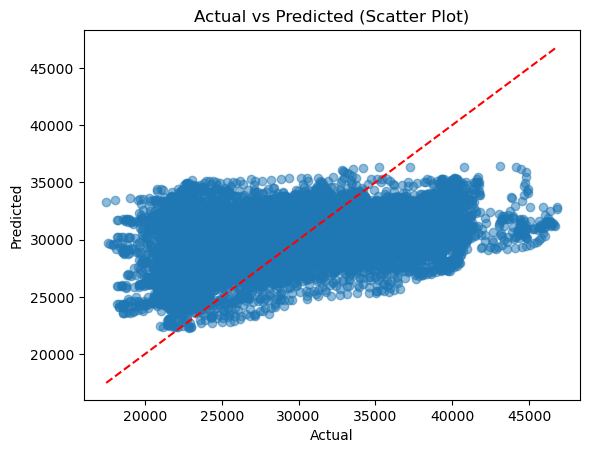

In [582]:
import matplotlib.pyplot as plt

plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.plot([min(result_df['Actual']), max(result_df['Actual'])], 
         [min(result_df['Actual']), max(result_df['Actual'])], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Scatter Plot)')
plt.show()


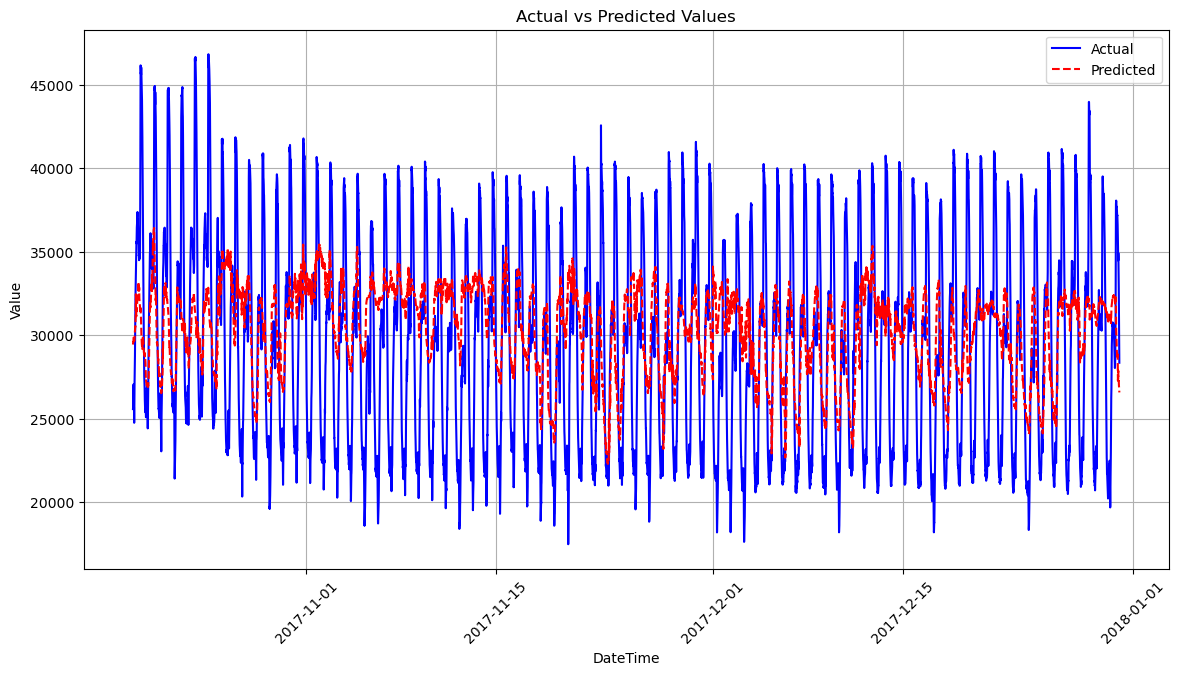

In [583]:
plt.figure(figsize=(14, 7))
plt.plot(result_df['DateTime'], result_df['Actual'], label='Actual', color='blue')
plt.plot(result_df['DateTime'], result_df['Predicted'], label='Predicted', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(rotation=45)  # Xoay các nhãn thời gian nếu cần
plt.grid(True)
plt.show()

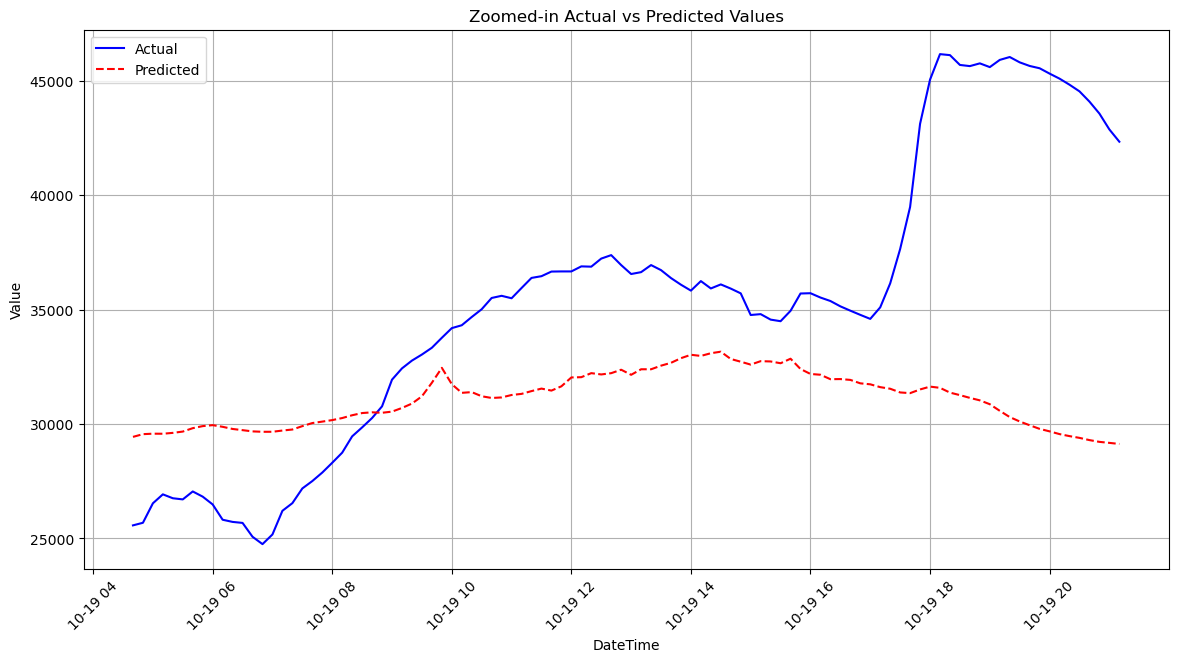

In [584]:
start_idx = 0
end_idx = 100  # Hiển thị 100 điểm đầu tiên
plt.figure(figsize=(14, 7))
plt.plot(result_df['DateTime'][start_idx:end_idx], result_df['Actual'][start_idx:end_idx], label='Actual', color='blue')
plt.plot(result_df['DateTime'][start_idx:end_idx], result_df['Predicted'][start_idx:end_idx], label='Predicted', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Zoomed-in Actual vs Predicted Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [585]:
correlation = result_df['Actual'].corr(result_df['Predicted'])
print(f'Hệ số tương quan Pearson giữa Actual và Predicted: {correlation}')


Hệ số tương quan Pearson giữa Actual và Predicted: 0.38676088489365396


In [586]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAE và MSE
mae = mean_absolute_error(y_test_inversed, y_pred_inversed)
mse = mean_squared_error(y_test_inversed, y_pred_inversed)

# Tính MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_inversed, y_pred_inversed)

# Tính RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_inversed, y_pred_inversed))

# Tính R² (Coefficient of Determination)
r2 = r2_score(y_test_inversed, y_pred_inversed)

# Tính RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(y_test_inversed)

# In ra kết quả
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")
print(f"RMAE (Relative Mean Absolute Error): {rmse}")

MAE (Mean Absolute Error): 4681.667236366487
RMSE (Root Mean Squared Error): 5765.639987685966
R² (Coefficient of Determination): 0.12575328453434875
RMAE (Relative Mean Absolute Error): 0.15888950170547056


## mô hình RNN

In [588]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Giả sử bạn đã có X_train_scaled và y_train_scaled từ trước (được chuẩn hóa)

# Xây dựng mô hình
model_rnn = Sequential()

# Lớp RNN
model_rnn.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

# Lớp Dropout để tránh overfitting
model_rnn.add(Dropout(0.2))

# Lớp Dense (fully connected)
model_rnn.add(Dense(units=1))  # Dự đoán một giá trị duy nhất (như dự đoán giá trị liên tục)

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model_rnn.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# In ra một số thông số huấn luyện
print("Đã huấn luyện mô hình RNN")



Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


656/656 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0674 - val_loss: 0.0236
Epoch 2/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0325 - val_loss: 0.0237
Epoch 3/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0305 - val_loss: 0.0236
Epoch 4/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0293 - val_loss: 0.0249
Epoch 5/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0290 - val_loss: 0.0247
Epoch 6/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0289 - val_loss: 0.0241
Epoch 7/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0292 - val_loss: 0.0241
Epoch 8/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0287 - val_loss: 0.0246
Epoch 9/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0288 - val_loss: 0.0242
Epoch 10/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0290 - val_loss: 0.0260
Đã huấn luyện mô hình RNN


In [589]:
# Hiển thị cấu trúc mô hình
model_rnn.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,555 (33.42 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,704 (22.29 KB)

In [590]:
# Dự đoán trên tập kiểm tra
y_pred_rnn = model_rnn.predict(X_test)

# Chuyển đổi giá trị dự đoán về phạm vi ban đầu (ngược chuẩn hóa)
y_pred_inverseds = scaler_y.inverse_transform(y_pred_rnn)
y_test_inverseds = scaler_y.inverse_transform(y_test)

datetime_series = data.index[-len(y_test):]  # Lấy DateTime tương ứng với y_test

# Tạo DataFrame chứa các giá trị thực tế và dự đoán cùng với DateTime
result_dfs = pd.DataFrame({
    'DateTime': datetime_series,  # Chuỗi thời gian từ dữ liệu gốc
    'Actual': y_test_inverseds.flatten(),  # Giá trị thực tế
    'Predicted': y_pred_inverseds.flatten()  # Giá trị dự đoán
})

# Hiển thị kết quả
print(result_dfs.head(10))  # Hiển thị 10 bản ghi đầu tiên

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
             DateTime       Actual     Predicted
0 2017-10-19 04:40:00  25573.39168  31254.431641
1 2017-10-19 04:50:00  25686.82713  31336.642578
2 2017-10-19 05:00:00  26537.59300  31346.449219
3 2017-10-19 05:10:00  26928.31510  31351.968750
4 2017-10-19 05:20:00  26758.16193  31377.324219
5 2017-10-19 05:30:00  26707.74617  31430.611328
6 2017-10-19 05:40:00  27054.35449  31553.833984
7 2017-10-19 05:50:00  26827.48359  31610.601562
8 2017-10-19 06:00:00  26487.17724  31630.396484
9 2017-10-19 06:10:00  25819.16849  31566.250000


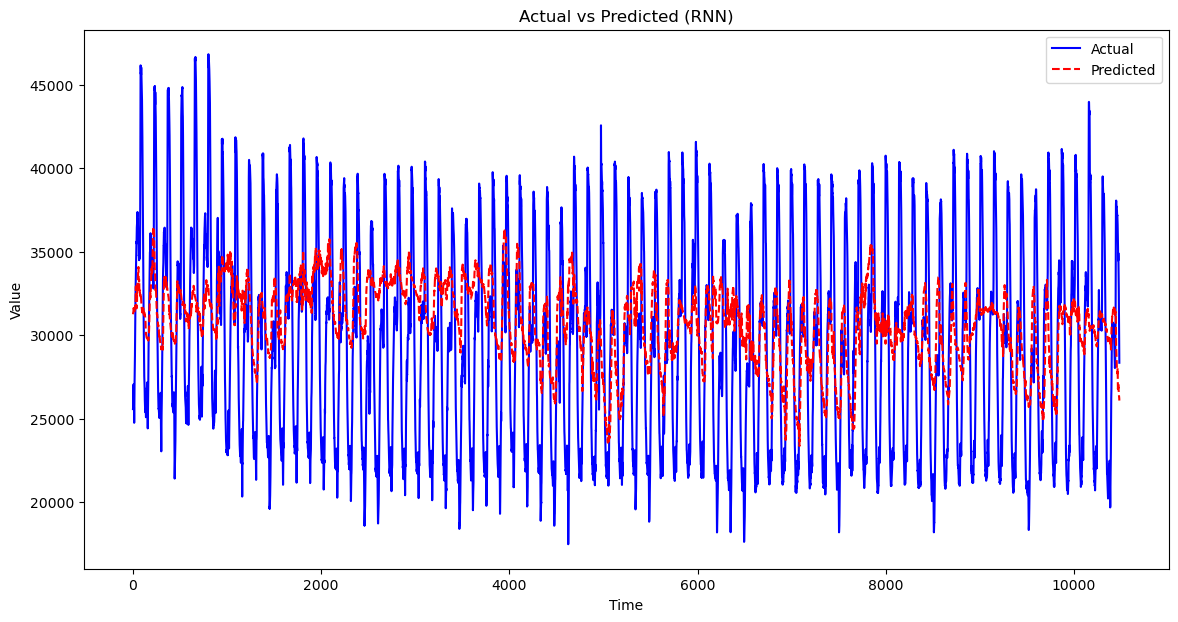

In [591]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh thực tế và dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverseds, label='Actual', color='blue')
plt.plot(y_pred_inverseds, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted (RNN)')
plt.legend()
plt.show()


In [592]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAE và MSE
mae = mean_absolute_error(y_test_inverseds, y_pred_inverseds)
mse = mean_squared_error(y_test_inverseds, y_pred_inverseds)

# Tính MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_inverseds, y_pred_inverseds)

# Tính RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_inverseds, y_pred_inverseds))

# Tính R² (Coefficient of Determination)
r2 = r2_score(y_test_inverseds, y_pred_inverseds)

# Tính RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(y_test_inverseds)

# In ra kết quả
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")
print(f"RMAE (Relative Mean Absolute Error): {rmse}")

MAE (Mean Absolute Error): 4934.882438725796
RMSE (Root Mean Squared Error): 5886.180920765369
R² (Coefficient of Determination): 0.08881579996372324
RMAE (Relative Mean Absolute Error): 0.16748328577764787


## mô hình DNN

In [594]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Giả sử bạn đã có X_train_scaled và y_train_scaled từ trước (được chuẩn hóa)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (41924, 5)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # (10482, 5)
# Xây dựng mô hình DNN
model_dnn = Sequential()

# Thêm lớp ẩn đầu tiên với 64 neuron, hàm kích hoạt ReLU
model_dnn.add(Dense(units=64, activation='relu', input_dim=X_train_flattened.shape[1]))

# Thêm lớp ẩn thứ hai với 32 neuron và Dropout để tránh overfitting
model_dnn.add(Dense(units=32, activation='relu'))
model_dnn.add(Dropout(0.2))  # Dropout tỷ lệ 20%
model_dnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model_dnn.fit(X_train_flattened, y_train, epochs=20, batch_size=32, validation_data=(X_test_flattened, y_test))

# In thông tin huấn luyện
print("Mô hình đã huấn luyện xong.")



Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1199 - val_loss: 0.0393
Epoch 2/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0982 - val_loss: 0.0411
Epoch 3/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 0.0976 - val_loss: 0.0404
Epoch 4/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.0978 - val_loss: 0.0393
Epoch 5/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0976 - val_loss: 0.0355
Epoch 6/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - loss: 0.0883 - val_loss: 0.0282
Epoch 7/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.0850 - val_loss: 0.0291
Epoch 8/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - loss: 0.0847 - val_loss: 0.0282
Epoch 9/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 0.0847 - val_loss: 0.0311
Epoch 10/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0839 - val_loss: 0.0293
Epoch 11/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0841 - val_loss: 0.0280
Epoch 12/20
1311/1311 ━━━━━━━

In [595]:
len(X_train_flattened)

41932

In [596]:
# Thêm lớp ẩn thứ ba với 16 neuron
model_dnn.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 32)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,394 (28.89 KB)

 Trainable params: 2,464 (9.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,930 (19.26 KB)

In [597]:
# Dự đoán trên tập kiểm tra
y_pred_dnn = model_dnn.predict(X_test_flattened)
# Lấy cột đầu tiên của y_pred_inversedss

# Chuyển đổi giá trị dự đoán về phạm vi ban đầu (ngược chuẩn hóa)
y_pred_inversedss = scaler_y.inverse_transform(y_pred_dnn)
y_test_inversedss = scaler_y.inverse_transform(y_test)
y_pred_inversedss = y_pred_inversedss[:, 0]
y_test_inversedss = y_test_inversedss.flatten()
# Lấy DateTime tương ứng với y_test
datetime_series = data.index[-len(y_test):]  # Lấy các giá trị DateTime cho các bản ghi trong y_test

# Tạo DataFrame chứa các giá trị thực tế và dự đoán cùng với DateTime
result_dfss = pd.DataFrame({
    'DateTime': datetime_series,  # Chuỗi thời gian từ dữ liệu gốc
    'Actual': y_test_inversedss.flatten(),  # Giá trị thực tế
    'Predicted': y_pred_inversedss.flatten()  # Giá trị dự đoán
})

# Hiển thị kết quả
print(result_dfss.head(10))  # Hiển thị 10 bản ghi đầu tiên


328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
             DateTime       Actual     Predicted
0 2017-10-19 04:40:00  25573.39168  24378.408203
1 2017-10-19 04:50:00  25686.82713  24364.539062
2 2017-10-19 05:00:00  26537.59300  24368.193359
3 2017-10-19 05:10:00  26928.31510  24312.804688
4 2017-10-19 05:20:00  26758.16193  24865.828125
5 2017-10-19 05:30:00  26707.74617  24882.013672
6 2017-10-19 05:40:00  27054.35449  25145.320312
7 2017-10-19 05:50:00  26827.48359  25243.632812
8 2017-10-19 06:00:00  26487.17724  25286.822266
9 2017-10-19 06:10:00  25819.16849  25212.816406


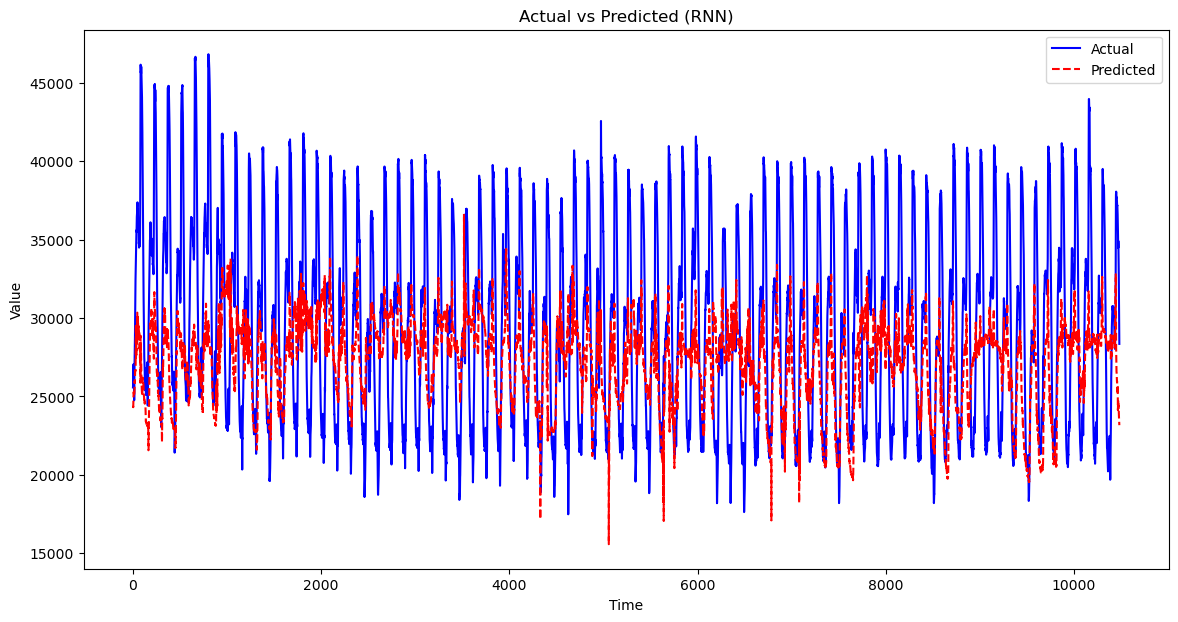

In [598]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh thực tế và dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test_inversedss, label='Actual', color='blue')
plt.plot(y_pred_inversedss, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted (RNN)')
plt.legend()
plt.show()


In [599]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAE và MSE
mae = mean_absolute_error(y_test_inversedss, y_pred_inversedss)
mse = mean_squared_error(y_test_inversedss, y_pred_inversedss)

# Tính MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_inversedss, y_pred_inversedss)

# Tính RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_inversedss, y_pred_inversedss))

# Tính R² (Coefficient of Determination)
r2 = r2_score(y_test_inversedss, y_pred_inversedss)

# Tính RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(y_test_inversedss)

# In ra kết quả
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")
print(f"RMAE (Relative Mean Absolute Error): {rmse}")

MAE (Mean Absolute Error): 4799.133701910142
RMSE (Root Mean Squared Error): 6079.190024449513
R² (Coefficient of Determination): 0.02808025565189476
RMAE (Relative Mean Absolute Error): 0.162876155868405


## mô hình GRU

In [601]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

model_gru = Sequential()

# Lớp GRU
model_gru.add(GRU(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

model_gru.add(Dropout(0.2))

model_gru.add(Dense(units=1))


# Biên dịch mô hình
model_gru.compile(optimizer='rmsprop', loss='mean_squared_error')


# Tóm tắt mô hình
model_gru.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 64)                  │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [602]:
# Huấn luyện mô hình
history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0441 - val_loss: 0.0226
Epoch 2/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0293 - val_loss: 0.0234
Epoch 3/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0289 - val_loss: 0.0256
Epoch 4/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0288 - val_loss: 0.0225
Epoch 5/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - val_loss: 0.0236
Epoch 6/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0282 - val_loss: 0.0273
Epoch 7/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0279 - val_loss: 0.0266
Epoch 8/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0279 - val_loss: 0.0227
Epoch 9/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0278 - val_loss: 0.0240
Epoch 10/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0280 - val_loss: 0.0260
Epoch 11/100
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0277 - val_loss: 0.0229
Epoch 12/100
656/656 ━━━━━━━━━━━━━━━━━━━━

In [603]:
# Dự đoán trên tập kiểm tra
y_pred_gru = model_rnn.predict(X_test)

# Chuyển đổi giá trị dự đoán về phạm vi ban đầu (ngược chuẩn hóa)
y_pred_inversedsss = scaler_y.inverse_transform(y_pred_gru)
y_test_inversedsss = scaler_y.inverse_transform(y_test)

datetime_series = data.index[-len(y_test):]  # Lấy DateTime tương ứng với y_test

# Tạo DataFrame chứa các giá trị thực tế và dự đoán cùng với DateTime
result_dfsss = pd.DataFrame({
    'DateTime': datetime_series,  # Chuỗi thời gian từ dữ liệu gốc
    'Actual': y_test_inversedsss.flatten(),  # Giá trị thực tế
    'Predicted': y_pred_inversedsss.flatten()  # Giá trị dự đoán
})

# Hiển thị kết quả
print(result_dfsss.head(10))  # Hiển thị 10 bản ghi đầu tiên

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
             DateTime       Actual     Predicted
0 2017-10-19 04:40:00  25573.39168  31254.431641
1 2017-10-19 04:50:00  25686.82713  31336.642578
2 2017-10-19 05:00:00  26537.59300  31346.449219
3 2017-10-19 05:10:00  26928.31510  31351.968750
4 2017-10-19 05:20:00  26758.16193  31377.324219
5 2017-10-19 05:30:00  26707.74617  31430.611328
6 2017-10-19 05:40:00  27054.35449  31553.833984
7 2017-10-19 05:50:00  26827.48359  31610.601562
8 2017-10-19 06:00:00  26487.17724  31630.396484
9 2017-10-19 06:10:00  25819.16849  31566.250000


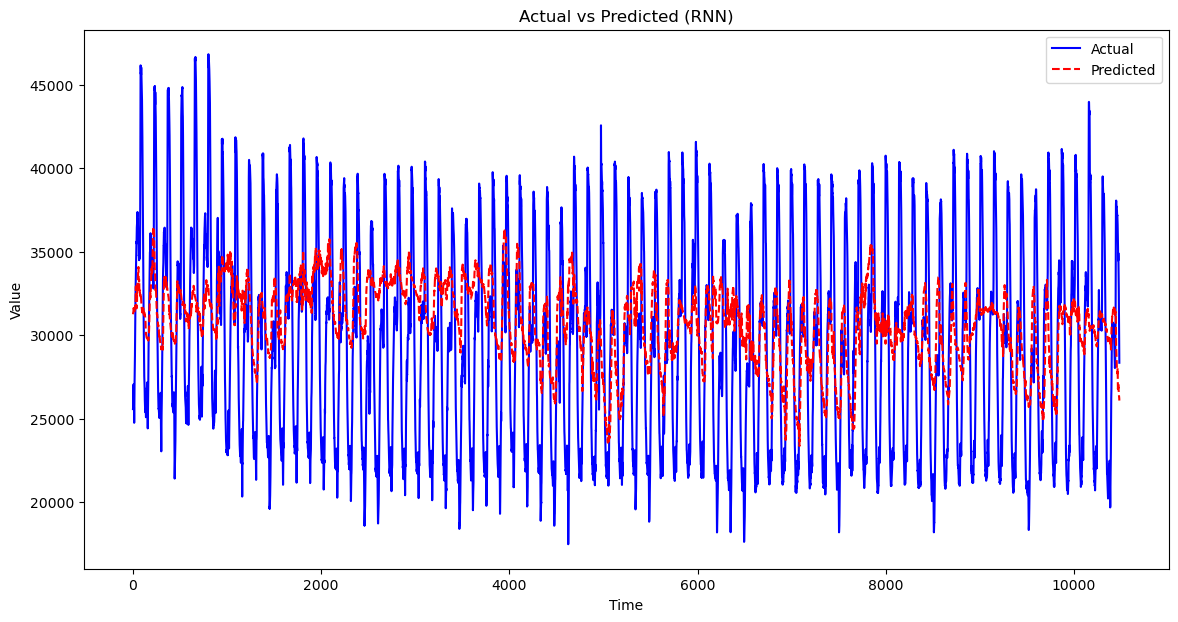

In [604]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh thực tế và dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test_inversedsss, label='Actual', color='blue')
plt.plot(y_pred_inversedsss, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted (RNN)')
plt.legend()
plt.show()


In [605]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAE và MSE
mae = mean_absolute_error(y_test_inversedsss, y_pred_inversedsss)
mse = mean_squared_error(y_test_inversedsss, y_pred_inversedsss)

# Tính MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_inversedsss, y_pred_inversedsss)

# Tính RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_inversedsss, y_pred_inversedsss))

# Tính R² (Coefficient of Determination)
r2 = r2_score(y_test_inversedsss, y_pred_inversedsss)

# Tính RMAE (Relative Mean Absolute Error)
rmae = mae / np.mean(y_test_inversedsss)

# In ra kết quả
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")
print(f"RMAE (Relative Mean Absolute Error): {rmse}")

MAE (Mean Absolute Error): 4934.882438725796
RMSE (Root Mean Squared Error): 5886.180920765369
R² (Coefficient of Determination): 0.08881579996372324
RMAE (Relative Mean Absolute Error): 0.16748328577764787


In [ ]:
MAE (Mean Absolute Error): 4681.667236366487
RMSE (Root Mean Squared Error): 5765.639987685966
R² (Coefficient of Determination): 0.12575328453434875
RMAE (Relative Mean Absolute Error): 0.15888950170547056

In [651]:
import pandas as pd

# Dữ liệu cho các mô hình
data = {
    "Mô Hình": ["LSTM", "RNN", "DNN", "GRU"],
    "MAE": [4681.667236366487, 4934.882438725796, 4799.133701910142, 4934.882438725796],
    "RMSE": [5765.639987685966, 5886.180920765369, 6079.190024449513, 5886.180920765369],
    "R²": [0.12575328453434875, 0.08881579996372324, 0.02808025565189476, 0.08881579996372324],
    "RMSE": [0.15888950170547056, 0.16748328577764787, 0.162876155868405, 0.16748328577764787]
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Hiển thị bảng
df

,Mô Hình,MAE,RMSE,R²
0,LSTM,4681.667236,0.158890,0.125753
1,RNN,4934.882439,0.167483,0.088816
2,DNN,4799.133702,0.162876,0.028080
3,GRU,4934.882439,0.167483,0.088816


Mô Hình MAE RMSE R² 0 LSTM 4681.667236 0.158890 0.125753 1 RNN 4934.882439 0.167483 0.088816 2 DNN 4799.133702 0.162876 0.028080 3 GRU 4934.882439 0.167483 0.088816 đánh giá và so sánh đi
Dựa trên các chỉ số MAE, RMSE và R², chúng ta có thể đánh giá và so sánh hiệu suất của các mô hình LSTM, RNN, DNN và GRU như sau:

1. LSTM (Long Short-Term Memory)
MAE: 4681.667236

RMSE: 0.158890

R²: 0.125753

LSTM có MAE và RMSE thấp nhất, cho thấy mô hình này có khả năng dự đoán tốt hơn so với các mô hình khác. R² của LSTM cũng cao nhất, cho thấy mô hình này giải thích được nhiều biến động trong dữ liệu hơn.

2. RNN (Recurrent Neural Network)
MAE: 4934.882439

RMSE: 0.167483

R²: 0.088816

RNN có MAE và RMSE cao hơn so với LSTM, cho thấy mô hình này có độ chính xác thấp hơn. R² của RNN cũng thấp hơn, cho thấy mô hình này giải thích được ít biến động trong dữ liệu hơn.

3. DNN (Deep Neural Network)
MAE: 4799.133702

RMSE: 0.162876

R²: 0.028080

DNN có MAE và RMSE cao hơn so với LSTM nhưng thấp hơn so với RNN và GRU. Tuy nhiên, R² của DNN rất thấp, cho thấy mô hình này giải thích được rất ít biến động trong dữ liệu.

4. GRU (Gated Recurrent Unit)
MAE: 4934.882439

RMSE: 0.167483

R²: 0.088816

GRU có MAE và RMSE tương đương với RNN, cho thấy mô hình này có độ chính xác tương tự. R² của GRU cũng tương đương với RNN, cho thấy mô hình này giải thích được ít biến động trong dữ liệu.

Kết luận
LSTM là mô hình tốt nhất trong số các mô hình được so sánh, với MAE và RMSE thấp nhất và R² cao nhất.

RNN và GRU có hiệu suất tương đương nhau, nhưng kém hơn so với LSTM.

DNN có MAE và RMSE trung bình, nhưng R² rất thấp, cho thấy mô hình này không giải thích được nhiều biến động trong dữ liệu.